# Libraries

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
Table2 = pd.read_csv('Dataset.csv')
Table2.head()

,transaction_date,item_id,transaction_id,item_name,item_brand,item_main_category,item_sub_category,item_gender,item_coupon,item_price,return_quantity,item_quantity,transaction_revenue,item_revenue_NOCOUP,refund_value,cost_goods_sold,distribution_cost
0,2020-07-05,878967,1007325426,watch,Swarovski,Accessories,Watches,Women,0.0,105.0,0,1,105.0,105.0,NaN,69.3,5.24
1,2020-03-01,893039,1005954178,scarf,Pierre Cardin,Accessories,Scarves & Winter Hats & Gloves,Men,0.0,5.0,0,1,5.0,5.0,NaN,2.9,5.24
2,2020-04-25,579415,1006478692,bodysuit,Prism,Suits & Tops,Dresses & Jumpsuits,Children & Toddlers,0.0,3.0,0,4,13.5,12.0,NaN,4.4,20.96
3,2020-02-05,908195,5702250,scarf,Prism,Accessories,Scarves & Winter Hats & Gloves,Men,0.0,10.0,0,1,10.0,10.0,NaN,2.8,5.24
4,2020-05-04,692379,1006556056,hat,Prism,Accessories,Headwear,Children & Toddlers,0.0,2.0,0,2,22.0,4.0,NaN,1.6,10.48


In [3]:
Product= Table2[[ 'item_name', 'item_brand', 'item_main_category', 'item_sub_category']].drop_duplicates()
Product.insert(0, 'Product_id', range(1, 1 + len(Product)))
Table= pd.merge( Table2,Product, on=['item_name', 'item_brand', 'item_main_category', 'item_sub_category'], how='inner')


In [4]:
Table.sort_values(by='Product_id')

,transaction_date,item_id,transaction_id,item_name,item_brand,item_main_category,item_sub_category,item_gender,item_coupon,item_price,return_quantity,item_quantity,transaction_revenue,item_revenue_NOCOUP,refund_value,cost_goods_sold,distribution_cost,Product_id
0,2020-07-05,878967,1007325426,watch,Swarovski,Accessories,Watches,Women,0.00,105.0,0,1,105.0,105.0,NaN,69.3,5.24,1
38778,2021-03-19,986359,1010858271,watch,Swarovski,Accessories,Watches,Women,0.00,280.0,0,1,280.0,280.0,NaN,165.6,5.24,1
38847,2020-08-14,878946,1007667246,watch,Swarovski,Accessories,Watches,Women,0.00,105.0,0,1,105.0,105.0,NaN,56.7,5.24,1
97546,2021-12-11,878965,1015050136,watch,Swarovski,Accessories,Watches,Women,0.00,105.0,0,2,150.0,210.0,NaN,133.2,10.48,1
71722,2020-09-24,869342,1008020985,watch,Swarovski,Accessories,Watches,Women,0.00,210.0,0,1,210.0,210.0,NaN,121.1,5.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795349,2022-05-18,1137756,1017464782,lifestyle shoes,Helly Hansen,Shoes & Bags,Shoes,Men,0.00,127.5,0,1,127.5,127.5,NaN,70.0,5.24,2551
774343,2021-08-02,991232,1013306689,lifestyle shoes,Helly Hansen,Shoes & Bags,Shoes,Men,0.00,100.0,0,3,295.0,300.0,NaN,140.1,15.72,2551
805668,2022-06-20,1137756,1017940971,lifestyle shoes,Helly Hansen,Shoes & Bags,Shoes,Men,0.00,135.0,1,1,135.0,135.0,135.0,0.0,5.24,2551
768067,2022-07-16,1137756,1018175478,lifestyle shoes,Helly Hansen,Shoes & Bags,Shoes,Men,0.15,120.0,0,1,102.0,120.0,NaN,70.0,5.24,2551


In [7]:
Table[[ 'transaction_date', 'Product_id', 'item_quantity', 'return_quantity']]

,transaction_date,Product_id,item_quantity,return_quantity
0,2020-07-05,1,1,0
1,2020-03-01,2,1,0
2,2020-04-25,3,4,0
3,2020-02-05,4,1,0
4,2020-05-04,5,2,0
...,...,...,...,...
818222,2021-06-14,2520,1,0
818223,2020-08-29,2525,1,1
818224,2021-12-27,2525,1,1
818225,2022-05-04,2518,1,0


In [8]:
Table_L = Table.groupby(['transaction_date', 'Product_id']).agg({
    'item_quantity': 'sum',
    'return_quantity': 'sum'
}).reset_index()

In [9]:
Top =  Table.groupby([ 'Product_id']).agg({'item_quantity': 'sum'}).reset_index()
Top = Top.sort_values(by ='item_quantity', ascending=False)
Top

,Product_id,item_quantity
2080,2081,183148
2085,2086,69496
1932,1933,55298
2347,2348,48871
2081,2082,43684
...,...,...
2280,2281,1
1662,1663,1
1663,1664,1
1525,1526,1


In [10]:
df = Table_L[Table_L['Product_id'] == 2081]
df

,transaction_date,Product_id,item_quantity,return_quantity
294,2020-01-02,2081,3,0
487,2020-01-03,2081,1,0
671,2020-01-04,2081,1,0
858,2020-01-05,2081,4,1
1042,2020-01-06,2081,5,1
...,...,...,...,...
208618,2022-08-13,2081,257,3
208937,2022-08-14,2081,389,3
209278,2022-08-15,2081,506,0
209660,2022-08-16,2081,430,0


C:\Users\ornel\AppData\Local\Temp\ipykernel_2704\2927375075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


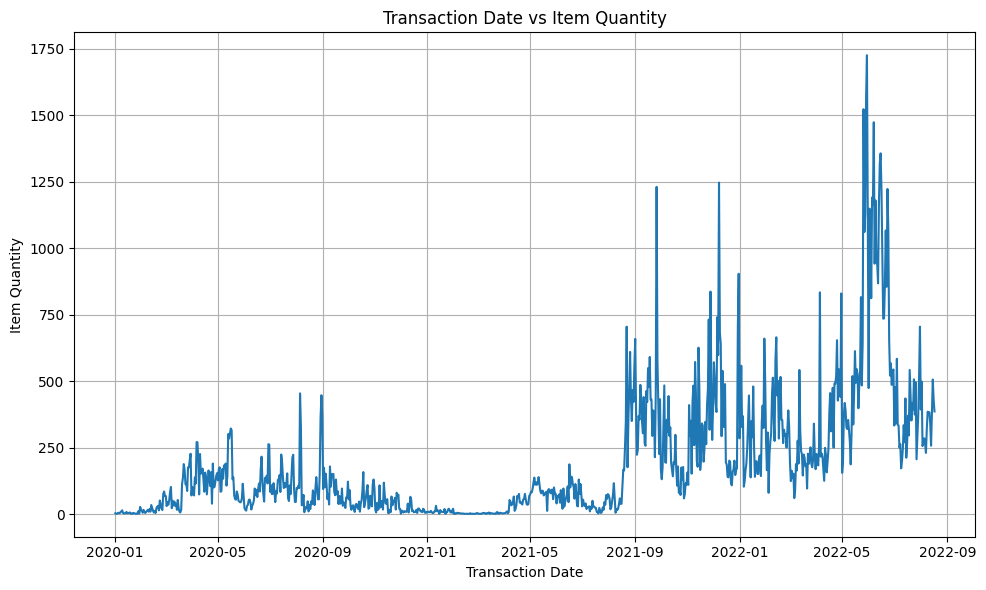

In [11]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['transaction_date'], df['item_quantity'], linestyle='-')
plt.title('Transaction Date vs Item Quantity')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:

#Separate dates for future plotting
train_dates = pd.to_datetime(df['transaction_date'])
print(train_dates.tail(15)) #Check last few dates. 


205303   2022-08-03
205639   2022-08-04
205955   2022-08-05
206256   2022-08-06
206568   2022-08-07
206925   2022-08-08
207281   2022-08-09
207627   2022-08-10
207957   2022-08-11
208307   2022-08-12
208618   2022-08-13
208937   2022-08-14
209278   2022-08-15
209660   2022-08-16
210010   2022-08-17
Name: transaction_date, dtype: datetime64[ns]


In [13]:

#Variables for training
cols = list(df)[2:4]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

['item_quantity', 'return_quantity']


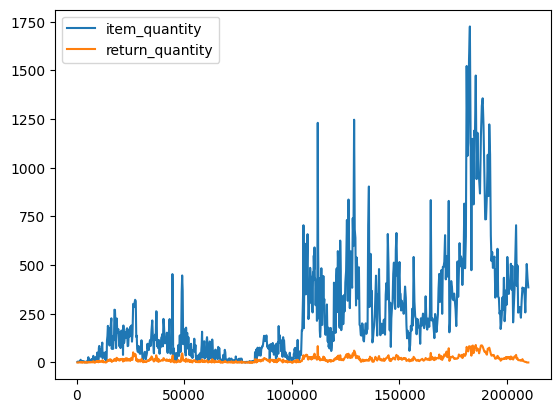

In [14]:

df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [15]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

In [16]:

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (924, 14, 2).
trainY shape == (924, 1).


In [17]:


#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

In [18]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29601 (115.63 KB)
Trainable params: 29601 (115.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
52/52 [==============================] - 9s 41ms/step - loss: 0.2859 - val_loss: 1.7285
Epoch 2/10
52/52 [==============================] - 1s 23ms/step - loss: 0.2177 - val_loss: 1.1925
Epoch 3/10
52/52 [==============================] - 1s 23ms/step - loss: 0.2027 - val_loss: 2.2014
Epoch 4/10
52/52 [==============================] - 1s 22ms/step - loss: 0.1885 - val_loss: 1.2541
Epoch 5/10
52/52 [==============================] - 1s 23ms/step - loss: 0.1870 - val_loss: 1.5495
Epoch 6/10
52/52 [==============================] - 1s 23ms/step - loss: 0.1765 - val_loss: 1.9829
Epoch 7/10
52/52 [==============================] - 1s 23ms/step - loss: 0.1891 - val_loss: 1.7107
Epoch 8/10
52/52 [==============================] - 1s 23ms/step - loss: 0.1810 - val_loss: 1.5477
Epoch 9/10
52/52 [==============================] - 1s 23ms/step - loss: 0.1732 - val_loss: 2.4357
Epoch 10/10
52/52 [==============================] - 1s 21ms/step - loss: 0.1778 - val_loss: 1.6229


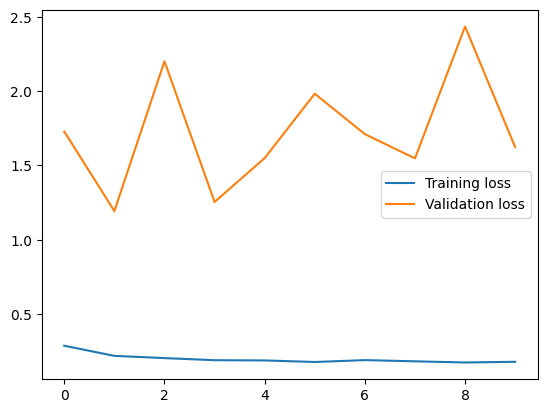

In [19]:

# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [20]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=30 #let us predict past 60 days

predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-08-17 00:00:00'), Timestamp('2022-08-18 00:00:00'), Timestamp('2022-08-19 00:00:00'), Timestamp('2022-08-22 00:00:00'), Timestamp('2022-08-23 00:00:00'), Timestamp('2022-08-24 00:00:00'), Timestamp('2022-08-25 00:00:00'), Timestamp('2022-08-26 00:00:00'), Timestamp('2022-08-29 00:00:00'), Timestamp('2022-08-30 00:00:00'), Timestamp('2022-08-31 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-09-02 00:00:00'), Timestamp('2022-09-06 00:00:00'), Timestamp('2022-09-07 00:00:00'), Timestamp('2022-09-08 00:00:00'), Timestamp('2022-09-09 00:00:00'), Timestamp('2022-09-12 00:00:00'), Timestamp('2022-09-13 00:00:00'), Timestamp('2022-09-14 00:00:00'), Timestamp('2022-09-15 00:00:00'), Timestamp('2022-09-16 00:00:00'), Timestamp('2022-09-19 00:00:00'), Timestamp('2022-09-20 00:00:00'), Timestamp('2022-09-21 00:00:00'), Timestamp('2022-09-22 00:00:00'), Timestamp('2022-09-23 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2022-09-27 00:00:00'), Timestamp('20

In [21]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

1/1 [==============================] - 1s 784ms/step


In [22]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'transaction_date':np.array(forecast_dates), 'item_quantity':y_pred_future})
df_forecast['transaction_date']=pd.to_datetime(df_forecast['transaction_date'])

In [23]:
# Assuming df is your DataFrame
original = df[['transaction_date', 'item_quantity']].copy()  # Make a copy to avoid the warning

# Convert 'transaction_date' to datetime using .loc
original.loc[:, 'transaction_date'] = pd.to_datetime(original['transaction_date'])

# Filter data for dates starting from '2020-01-01'
original = original.loc[original['transaction_date'] >= '2022-01-01']

C:\Users\ornel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ornel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ornel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ornel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

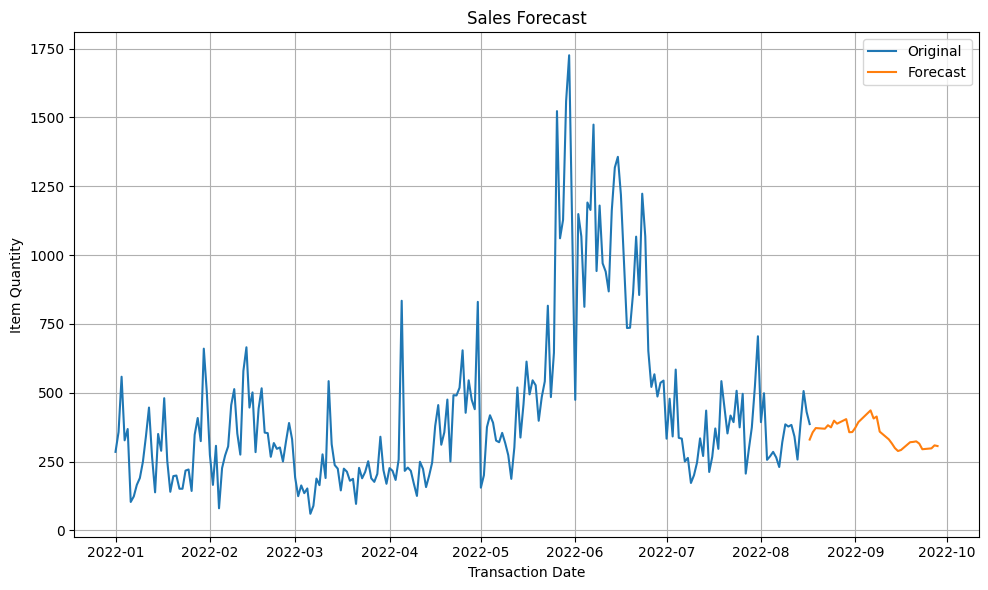

In [24]:
# Plotting the original data
plt.figure(figsize=(10, 6))
sns.lineplot(data=original, x='transaction_date', y='item_quantity', label='Original')
sns.lineplot(data=df_forecast, x='transaction_date', y='item_quantity', label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Transaction Date')
plt.ylabel('Item Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df_forecast

,transaction_date,item_quantity
0,2022-08-17,329.658386
1,2022-08-18,356.161835
2,2022-08-19,371.488220
3,2022-08-22,369.079834
4,2022-08-23,381.736237
5,2022-08-24,374.029755
6,2022-08-25,398.304840
7,2022-08-26,387.380615
8,2022-08-29,403.991119
9,2022-08-30,356.447723


In [26]:
avg_quantity = df_forecast.iloc[:, 1].mean()

In [27]:
avg_quantity

349.2026